In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
x1 = np.linspace(-10, 10, 50)
x2 = np.linspace(-10, 10, 50)
print(x1.shape)

(50,)


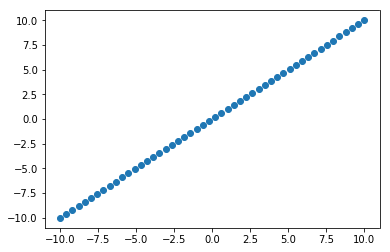

In [4]:
plt.scatter(x1, x2)
plt.show()

In [5]:
x1, x2 = np.meshgrid(x1, x2)              #This will make 1x50 matrix to 50x50 matrix
                                          #Now, x1 has repeated rows and x2 has repeated cols
print(x1.shape)                     

(50, 50)


In [6]:
print(x1.shape, x2.shape)
Y = np.sqrt(np.square(x1) + np.square(x2))
print(Y.shape)

(50, 50) (50, 50)
(50, 50)


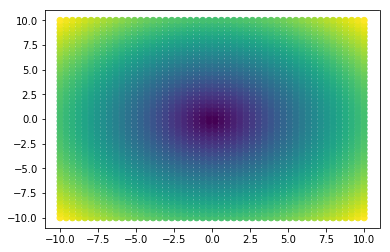

In [7]:
plt.scatter(x1, x2, c=Y)
plt.show()

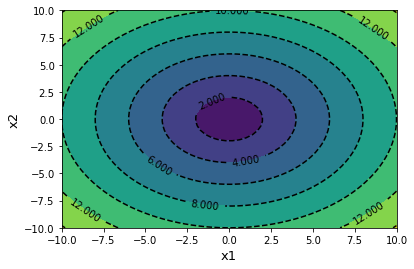

In [8]:
cp = plt.contour(x1, x2, Y, colors='black', linestyles='dashed')  #the 'colors' and 'linestyles' is to specify the color and style of the line
plt.clabel(cp)
cp = plt.contourf(x1, x2, Y)    #contourf gives the colored contour plot 
plt.xlabel("x1", fontsize=13)
plt.ylabel("x2", fontsize=13)
plt.show()

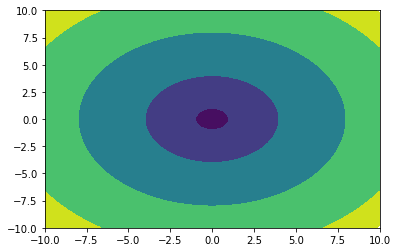

In [9]:
levels = [0.0, 1.0, 4.0, 8.0, 12.0, 14.0]
cp = plt.contourf(x1, x2, Y, levels)   #You can't specify 'colors' attribute in this b'coz it turns the complete graph black
                                       # this levels attributes only displays levels that you want 

In [17]:
import pandas as pd

data = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv', index_col=0)


y = data['sales']
X = np.column_stack((data['TV'], data['radio']))
 
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
def gradient_descent(W, x, y):
    y_hat = x.dot(W).flatten()
    error = (y - y_hat)
    mse = (1.0 / len(x)) * np.sum(np.square(error))
    gradient = -(1.0 / len(x)) * error.dot(x)
    return gradient, mse

In [20]:
w = np.array((-40, -40))
alpha = .1
tolerance = 1e-3
 
old_w = []
errors = []

In [21]:
# Perform Gradient Descent
iterations = 1
for i in range(200):
    gradient, error = gradient_descent(w, X_scaled, y)
    new_w = w - alpha * gradient
 
    # Print error every 10 iterations
    if iterations % 10 == 0:
        print("Iteration: %d - Error: %.4f" % (iterations, error))
        old_w.append(new_w)
        errors.append(error)
 
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print('Gradient Descent has converged')
        break
 
    iterations += 1
    w = new_w
 
print('w =', w)

Iteration: 10 - Error: 732.6317
Iteration: 20 - Error: 256.7896
Iteration: 30 - Error: 205.5887
Iteration: 40 - Error: 200.0794
Iteration: 50 - Error: 199.4866
Iteration: 60 - Error: 199.4228
Iteration: 70 - Error: 199.4159
Iteration: 80 - Error: 199.4152
Gradient Descent has converged
w = [3.91359776 2.77964408]


In [22]:
all_ws = np.array(old_w)
 
# Just for visualization
errors.append(600)
errors.append(500)
errors.append(400)
errors.append(300)
errors.append(225)
 
levels = np.sort(np.array(errors))

In [24]:
w0 = np.linspace(-w[0] * 5, w[0] * 5, 100)
w1 = np.linspace(-w[1] * 5, w[1] * 5, 100)
mse_vals = np.zeros(shape=(w0.size, w1.size))

In [25]:
for i, value1 in enumerate(w0):
    for j, value2 in enumerate(w1):
        w_temp = np.array((value1,value2))        
        mse_vals[i, j] = gradient_descent(w_temp, X_scaled, y)[1]

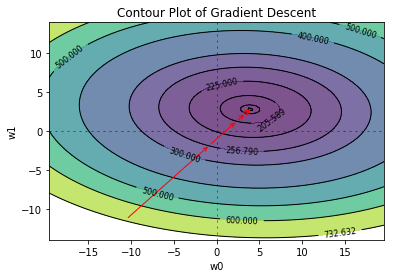

In [26]:
plt.contourf(w0, w1, mse_vals, levels,alpha=.7)
plt.axhline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1)
plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)
for i in range(len(old_w) - 1):
    plt.annotate('', xy=all_ws[i + 1, :], xytext=all_ws[i, :],
                 arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                 va='center', ha='center')
 
CS = plt.contour(w0, w1, mse_vals, levels, linewidths=1,colors='black')
plt.clabel(CS, inline=1, fontsize=8)
plt.title("Contour Plot of Gradient Descent")
plt.xlabel("w0")
plt.ylabel("w1")
plt.show()